## 0.Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Reading Kaggle Dataset
##### (Link to download: https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 1.Data Exploration

### 1.0.Dealing with missing data

#### CustomerID column is useless so we drop it from our dataset

In [3]:
df.drop('customerID',axis='columns',inplace=True)

#### Then it's always useful to check if data types are related to the column actual values or not! 

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### TotalCharges is object however it must be float!

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### As we can see they're strings, Let's convert them!
##### what we did here is, we replaced strings to numerics, also we closed our eyes on the possible errors like empty values!
##### and as we can see there are 11 rows without values in their TotalCharges column

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### for now we just delete them out of our dataset, later on we will use other possible ways of dealing with missing data!

In [7]:
print(df.shape, 'Before droping')
df1= df[df.TotalCharges!=' ']
print(df1.shape, 'After droping')

(7043, 20) Before droping
(7032, 20) After droping


In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

### 1.1.Visualization: histogram
##### for visualizaition we use, tenure column which is a measure for how many months someone has been a customer 

In [9]:
# partitioning
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

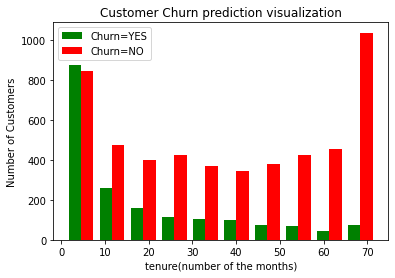

In [10]:
plt.xlabel("tenure(number of the months)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn prediction visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=YES','Churn=NO'])
plt.legend()

##### We can easily see customers with more tenure tend not to churn! 
##### Let's do the same thing for MonthlyCharges

In [11]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

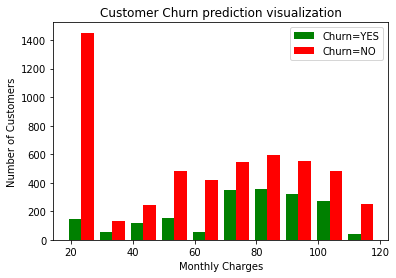

In [12]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn prediction visualization")

plt.hist([mc_churn_yes, mc_churn_no], color=['green','red'], label=['Churn=YES','Churn=NO'])
plt.legend()

##### We can see how customers with low monthly charges are not going to churn

### 1.2.Label Encoding
#### Columns with string values are not useful for our Neural Network! As a result, we encode them to numbers

#### IMPORTANT: One thing that we have to keep in mind is that, for our Neural Network, 2 is greater than 1, so in turning our string values to numbers, we have to keep this matter in mind that we encode our values in way that it does not effect our model

##### 1.2.1-First we find unique values in columns with object values(we don't want to mess with columns that have number values)

In [31]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [32]:
print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### For some of the values we can replace 'No internet service' or 'No phone service' with 'No'!

In [34]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### 1.2.2.Replacing Yes/No values with [0,1]

In [36]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                  "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
print_unique_column_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### For categorical columns: if you have 2 categories [0,1] is ok! for example:

In [37]:
df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
print_unique_column_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### 1.2.3.More Than Two Categories: For the left columns above, they have categorical values that are more than just 2 categories. For them we use One-Hot Encoding
##### for each category, we make a new column, and fill it with [0,1] values so they do not have any advantages over one another

In [38]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### We can see we have succesfully turned our 'String' and 'Categorical' values to numbers

### 1.3.Scaling
#### We scale columns that have different numbers and are not scaled over a specific value

In [43]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
323,0,0,1,1,9,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3255,0,1,1,1,66,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4848,0,0,0,0,5,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [47]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2[columns_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


## 2.Train-Test-Split

In [49]:
X = df2.drop('Churn', axis="columns")
y = df2['Churn']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


## 3.Neural Network

### 3.0.Import package

In [52]:
import tensorflow as tf
from tensorflow import keras

### 3.1.build network layers
#### we use only one hidden layer, and for the output layer we going to have one node, based on 0/1 churn value

In [57]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

#### Some important options we have, that we can control and give different values to make our output more reliable are:
#### - Optimizer, Loss function
#### Also we have different metrics..

In [58]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 12s 21ms/step - loss: 0.5036 - accuracy: 0.7497
Epoch 2/50
176/176 [==============================] - 3s 18ms/step - loss: 0.4287 - accuracy: 0.7947
Epoch 3/50
176/176 [==============================] - 3s 19ms/step - loss: 0.4207 - accuracy: 0.7982
Epoch 4/50
176/176 [==============================] - 3s 20ms/step - loss: 0.4168 - accuracy: 0.8004
Epoch 5/50
176/176 [==============================] - 3s 18ms/step - loss: 0.4140 - accuracy: 0.8039
Epoch 6/50
176/176 [==============================] - 3s 19ms/step - loss: 0.4131 - accuracy: 0.8073
Epoch 7/50
176/176 [==============================] - 3s 18ms/step - loss: 0.4123 - accuracy: 0.8046
Epoch 8/50
176/176 [==============================] - 4s 21ms/step - loss: 0.4111 - accuracy: 0.8055
Epoch 9/50
176/176 [==============================] - 3s 19ms/step - loss: 0.4113 - accuracy: 0.8076
Epoch 10/50
176/176 [==============================] - 4s 20ms/step - loss: 0.4094 - accur

### 3.2.Model Evaluation

In [59]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 17ms/step - loss: 0.4445 - accuracy: 0.7932


[0.4445476830005646, 0.7931769490242004]

In [60]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.1976241 ],
       [0.4632344 ],
       [0.01349575],
       [0.7718076 ],
       [0.5107606 ]], dtype=float32)

In [61]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [63]:
y_prediction = []
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)
y_prediction[:5]

[0, 0, 0, 1, 1]

### 3.3.Model Accuracy, Precision, Recall and etc.

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

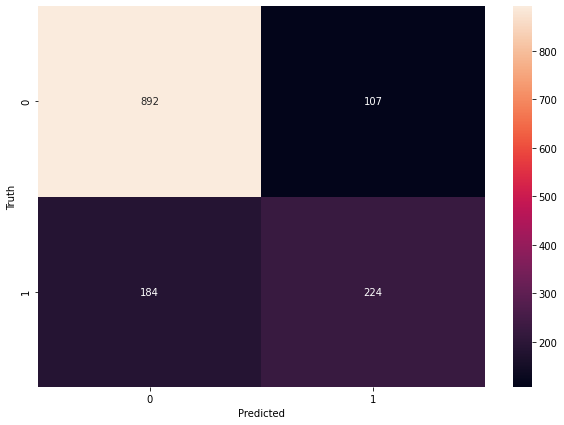

In [65]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [69]:
# Accuracy 
print(round((892+224)/(892+224+107+184),2))

# Precision for 0 class, customers who didn't churn
print(round(892/(892+184),2))

# Precision for 1 class, customers who churned
print(round(224/(224+107),2))

# Recall for 0 class
print(round(892/(892+107),2))
print(round(224/(224+184),2))

0.79
0.83
0.68
0.89
0.55
